# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

### Importe o dataset

In [7]:
dataset = pd.read_csv('dados_projeto.csv', sep = ';')

### Visualize o conteúdo do DataFrame

In [8]:
dataset.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [9]:
dataset.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [10]:
dataset.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<Axes: title={'center': 'Boxplot do consumo de cerveja ao longo do ano'}, xlabel='Consumo de cerveja (L)'>

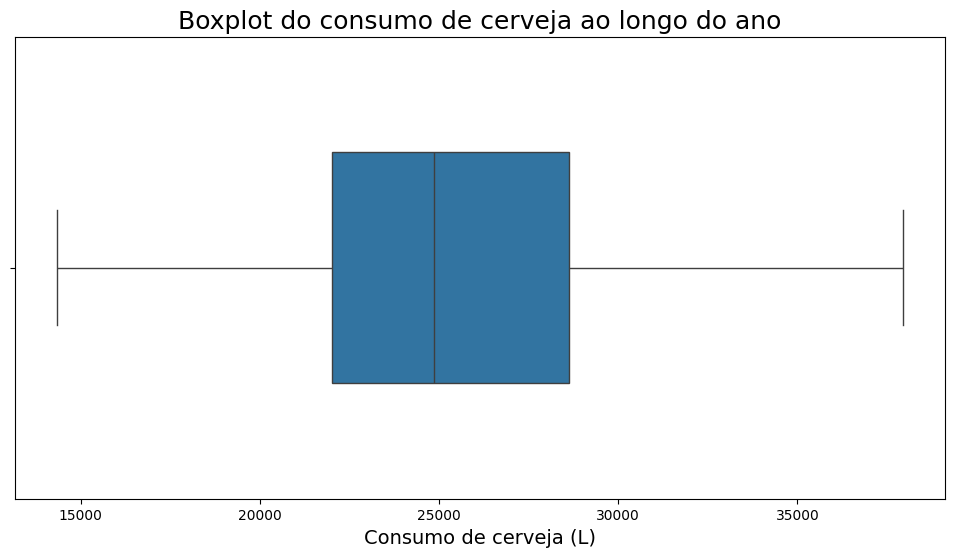

In [18]:
ax = sns.boxplot(data = dataset['Y'], orient = 'h', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot do consumo de cerveja ao longo do ano', fontsize = 18)
ax.set_xlabel('Consumo de cerveja (L)', fontsize = 14)
ax

<Axes: title={'center': 'Boxplot da temepratura ao longo do ano'}, xlabel='Temperatura (ºC)'>

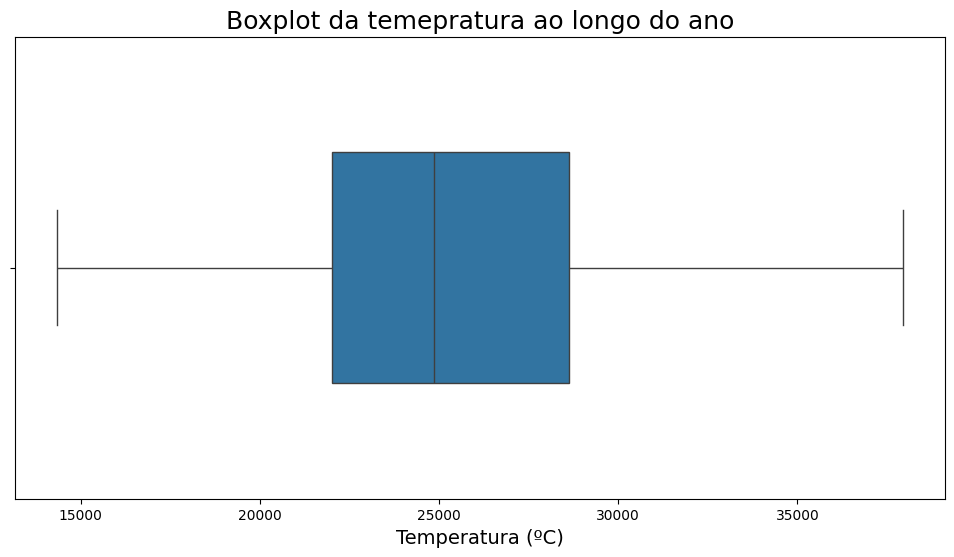

In [19]:
ax = sns.boxplot(data = dataset['Y'], orient = 'h', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da temepratura ao longo do ano', fontsize = 18)
ax.set_xlabel('Temperatura (ºC)', fontsize = 14)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

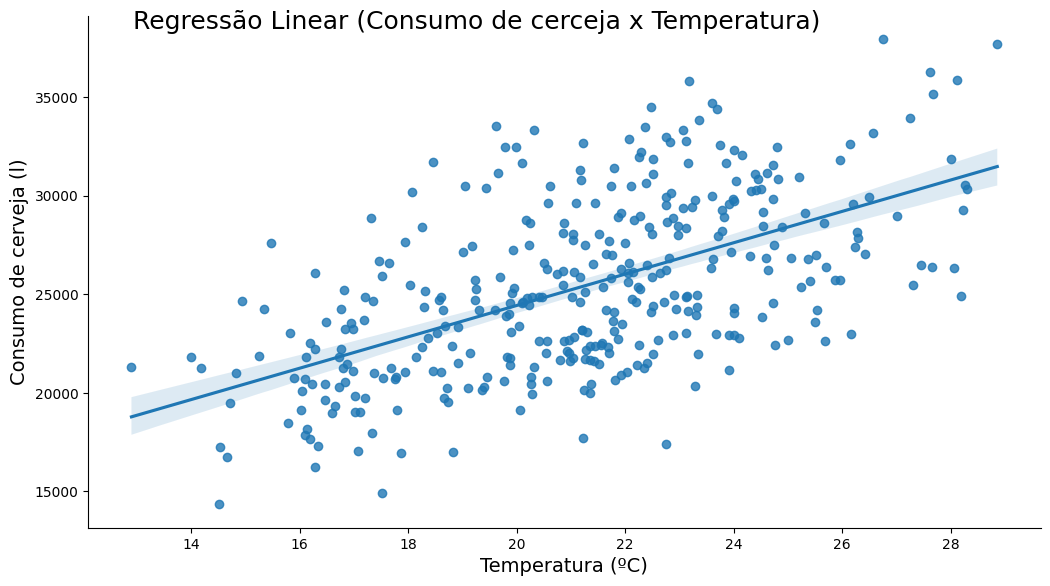

In [24]:
ax = sns.lmplot(data = dataset, x = 'X', y = 'Y')
ax.figure.set_size_inches(12, 6)
ax.fig.suptitle('Regressão Linear (Consumo de cerceja x Temperatura)', fontsize = 18)
ax.set_ylabels('Consumo de cerveja (l)', fontsize = 14)
ax.set_xlabels('Temperatura (ºC)', fontsize = 14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [25]:
dataset.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Sim

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [26]:
Y = dataset['Y']
X = sm.add_constant(dataset['X'])

### Estime o modelo de regressão linear simples

In [27]:
resultado_regressao = sm.OLS(Y, X, missing = 'drop').fit()

### Visualize o resultado da regressão

In [29]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.87e-33
Time:                        14:26:39   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [30]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset.head(10)

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315
5,28218,23.78,27431.214014
6,29732,24.00,27606.088172
7,28397,24.90,28321.482455
8,24886,28.20,30944.594828
9,37937,26.76,29799.963974


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [47]:
resultado_regressao.predict([1, 42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [32]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head(10)

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685
5,28218,23.78,27431.214014,786.785986
6,29732,24.00,27606.088172,2125.911828
7,28397,24.90,28321.482455,75.517545
8,24886,28.20,30944.594828,-6058.594828
9,37937,26.76,29799.963974,8137.036026


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<Axes: title={'center': 'Dispersão (Residuos x Y_previsto)'}, xlabel='Y_Previsto', ylabel='Residuos'>

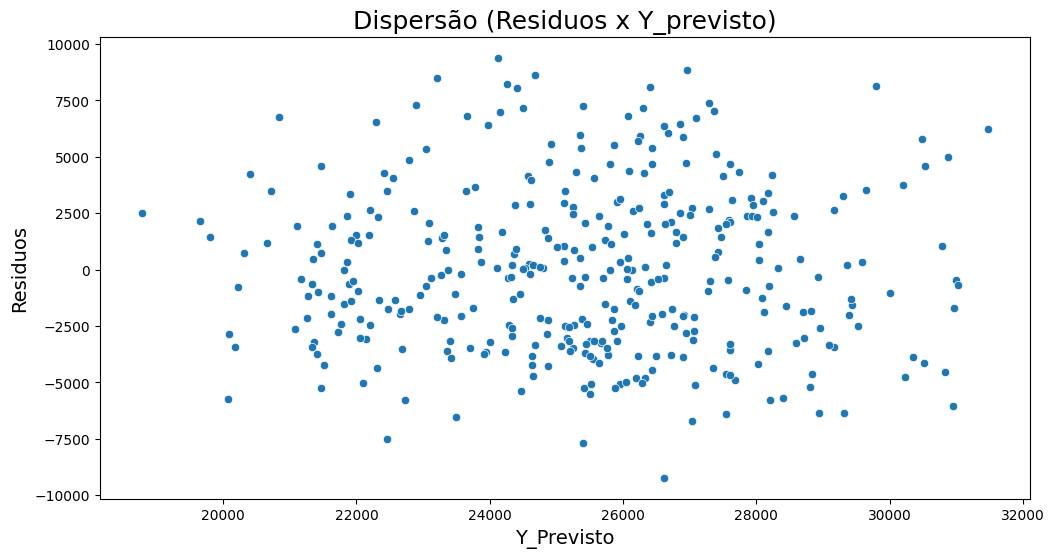

In [35]:
ax = sns.scatterplot(data = dataset, x = 'Y_previsto', y = 'Residuos')
ax.figure.set_size_inches(12, 6)
ax.set_title('Dispersão (Residuos x Y_previsto)', fontsize = 18)
ax.set_xlabel('Y_Previsto', fontsize = 14)
ax.set_ylabel('Residuos', fontsize = 14)
ax

### Obtenha o QQPlot dos resíduos

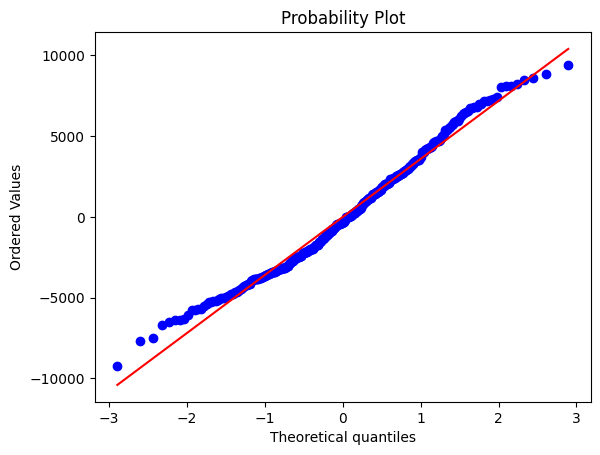

In [45]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_, (_, _, _)) = probplot(dataset['Residuos'], plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [37]:
SQR = dataset['Y_previsto'].apply(lambda y: (y - dataset['Y'].mean())**2).sum()
SQR

2325899486.7377872

In [38]:
SQT = dataset['Y'].apply(lambda y: (y - dataset['Y'].mean())**2).sum()
SQT

7044294174.805479

In [40]:
R2 = SQR / SQT
R2

0.33018204933243217

In [41]:
R2 = resultado_regressao.rsquared
R2

0.330182049332432

In [48]:
SQR = resultado_regressao.ess
SQR

2325899486.7377863

In [49]:
SQE = resultado_regressao.ssr
SQE

4718394688.067693

In [50]:
SQT = SQR + SQE
SQT

7044294174.805479